In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [3]:
col= []
for a in range(1,65):
    col.append('x'+str(a))
col.append('y')

year_1 = arff.loadarff("data/1year.arff")
# year_2 = arff.loadarff("data/2year.arff")
# year_3 = arff.loadarff("data/3year.arff")
# year_4 = arff.loadarff("data/4year.arff")
# year_5 = arff.loadarff("data/5year.arff")

df_year_1 = pd.DataFrame(year_1[0])
# df_year_2 = pd.DataFrame(year_2[0])
# df_year_3 = pd.DataFrame(year_3[0])
# df_year_4 = pd.DataFrame(year_4[0])
# df_year_5 = pd.DataFrame(year_5[0])

df_year_1.columns = col
df_year_1['y'] = df_year_1['y'].str.decode('utf-8')

# df_year_2.columns = col
# df_year_2['y'] = df_year_2['y'].str.decode('utf-8')

# df_year_3.columns = col
# df_year_3['y'] = df_year_3['y'].str.decode('utf-8')

# df_year_4.columns = col
# df_year_4['y'] = df_year_4['y'].str.decode('utf-8')

# df_year_5.columns = col
# df_year_5['y'] = df_year_5['y'].str.decode('utf-8')


In [4]:
df_year_1.y.value_counts()

y
0    6756
1     271
Name: count, dtype: int64

In [5]:
df_year_1.replace('?',np.nan,inplace=True)

In [6]:
df_year_1.isna().sum()

x1      3
x2      3
x3      3
x4     30
x5      8
       ..
x61    22
x62     0
x63    30
x64    34
y       0
Length: 65, dtype: int64

In [33]:
# multiple imputation for all missing values
imputer = IterativeImputer(max_iter=10, random_state=1)
df_imputed_array = imputer.fit_transform(df_year_1)

df_imputed = pd.DataFrame(df_imputed_array, columns=df_year_1.columns)

C:\Users\amfua\AppData\Roaming\Python\Python39\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [34]:
df_imputed.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
0,0.20055,0.37951,0.39641,2.0472,32.3510,0.38825,0.24976,1.33050,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.20912,0.49988,0.47225,1.9447,14.7860,0.00000,0.25834,0.99601,1.6996,0.49788,...,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0.00000,0.30906,0.43695,1.3090,0.30408,...,0.24114,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0


In [8]:
df_imputed.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.33050,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.20912,0.49988,0.47225,1.9447,14.786,0.00000,0.25834,0.99601,1.6996,0.49788,...,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0


In [35]:
df_imputed.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
count,7.027000e+03,7.027000e+03,7.027000e+03,7027.000000,7.027000e+03,7.027000e+03,7.027000e+03,7027.000000,7.027000e+03,7.027000e+03,...,7.027000e+03,7.027000e+03,7.027000e+03,7.027000e+03,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000
mean,1.337684e+42,7.603513e+42,-5.520759e+42,2.661774,-2.632583e+02,-2.934125e+42,-1.659473e+43,3.305171,-9.305277e+26,-1.395552e+44,...,-1.577367e+02,-2.117582e+21,1.587409e+02,-3.838483e+21,4.278133e+02,15.641278,4.763202e+03,9.767653,208.702535,0.038566
std,9.548216e+43,5.427290e+44,3.940647e+44,13.496345,3.705348e+04,2.094341e+44,1.184511e+45,58.794470,7.800354e+28,9.961271e+45,...,1.322125e+04,1.775109e+23,1.322124e+04,3.217693e+23,2.587865e+04,261.144735,3.107835e+05,135.880946,5128.256318,0.192571
min,-2.568900e+02,-7.216200e+01,-3.258057e+46,0.000000,-2.722100e+06,-1.731564e+46,-9.793325e+46,-141.410000,-6.538818e+30,-8.235802e+47,...,-1.108300e+06,-1.488025e+25,-4.194000e-03,-2.697302e+25,-3.183912e+04,0.000016,0.000000e+00,0.000015,-56.494612,0.000000
25%,2.120850e-02,2.967600e-01,2.680600e-02,1.064100,-4.462850e+01,0.000000e+00,2.789000e-02,0.447340,1.037100e+00,3.005550e-01,...,2.031450e-02,5.662050e-02,8.647650e-01,0.000000e+00,6.011150e+00,4.834250,4.322250e+01,3.432500,2.549200,0.000000
50%,7.588400e-02,4.830900e-01,1.811800e-01,1.505200,-5.575300e+00,0.000000e+00,9.003800e-02,1.022100,1.205500e+00,4.921900e-01,...,6.338200e-02,1.756700e-01,9.388100e-01,2.842400e-02,1.024900e+01,7.046300,6.850900e+01,5.327800,4.657300,0.000000
75%,1.603400e-01,6.805350e-01,3.625000e-01,2.476050,3.769500e+01,1.465700e-01,1.886450e-01,2.286700,2.132950e+00,6.755850e-01,...,1.376950e-01,3.518950e-01,9.820150e-01,2.735950e-01,2.136250e+01,10.772500,1.063350e+02,8.329900,9.906650,0.000000
max,7.894296e+45,4.487187e+46,1.000000e+00,1017.800000,9.909000e+05,3.036700e+02,4.537700e+02,4674.513644,3.876100e+03,1.099500e+03,...,1.000000e+00,1.266700e+02,1.108300e+06,1.195800e+02,2.137800e+06,21110.000000,2.501600e+07,11271.923727,294770.000000,1.000000


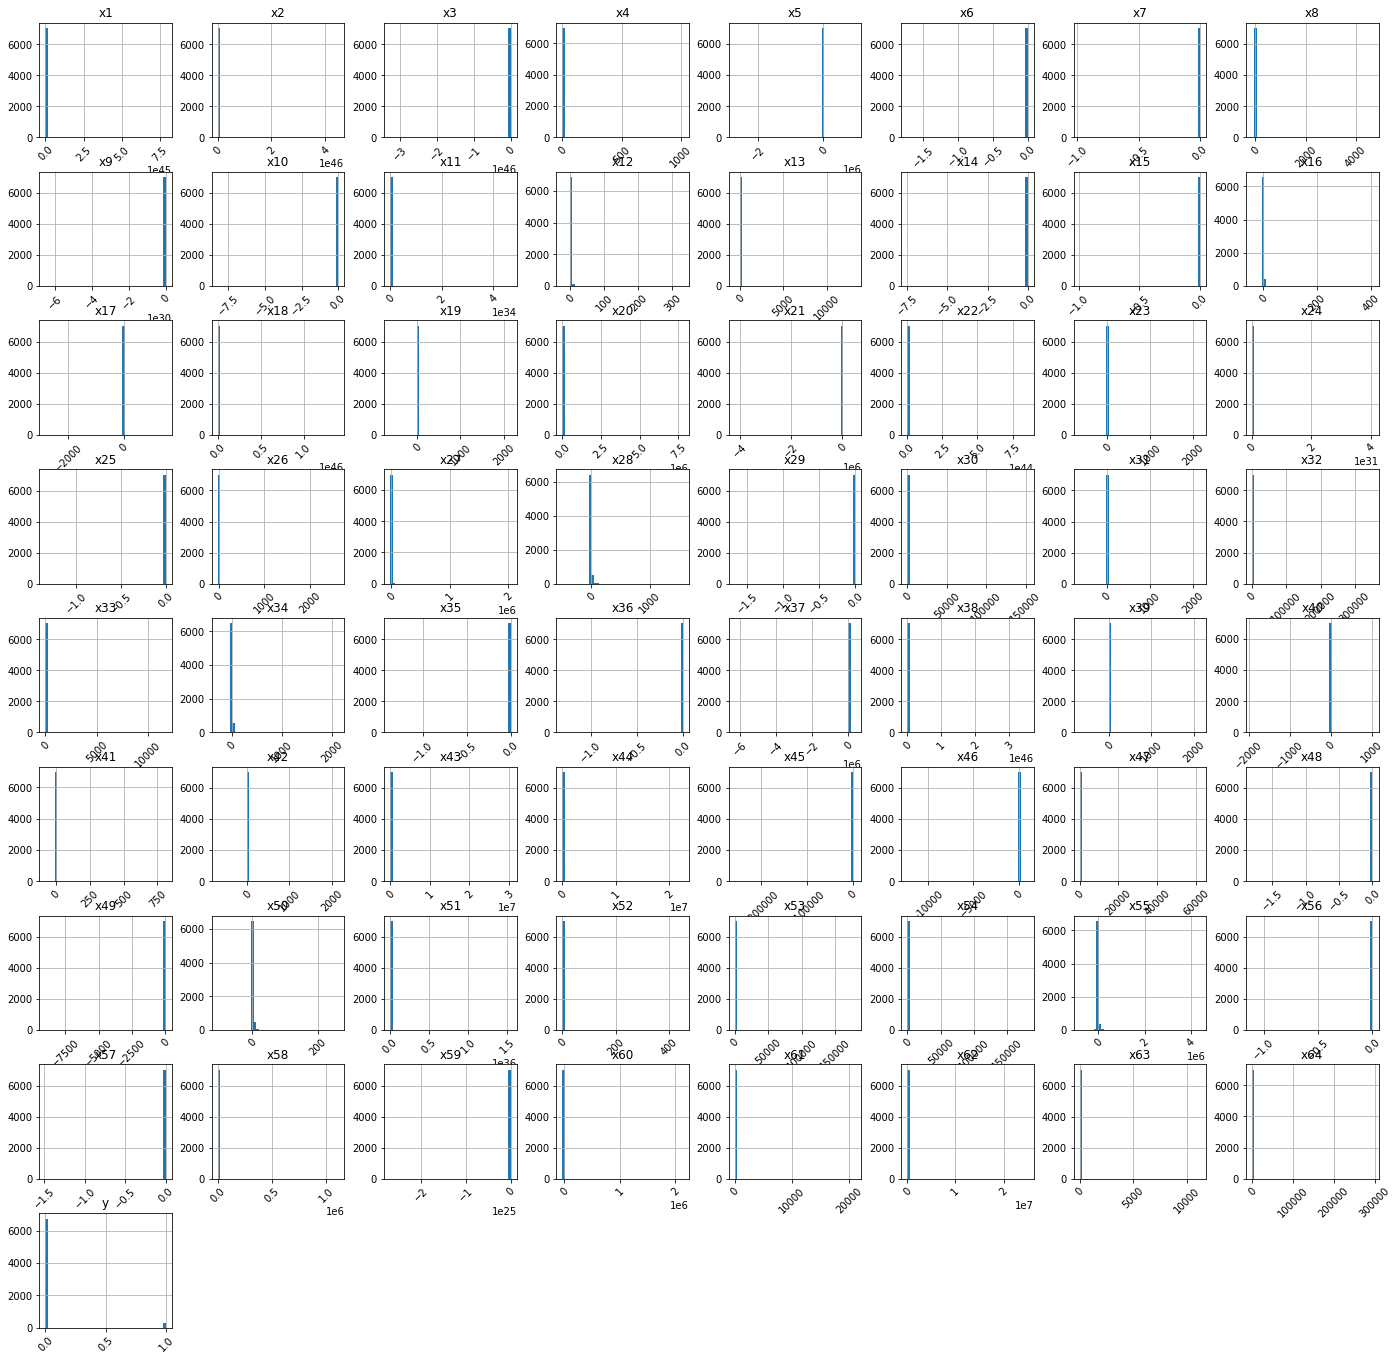

In [10]:
df_imputed.hist(figsize=(24,24), xrot=45,bins=50)
plt.show()

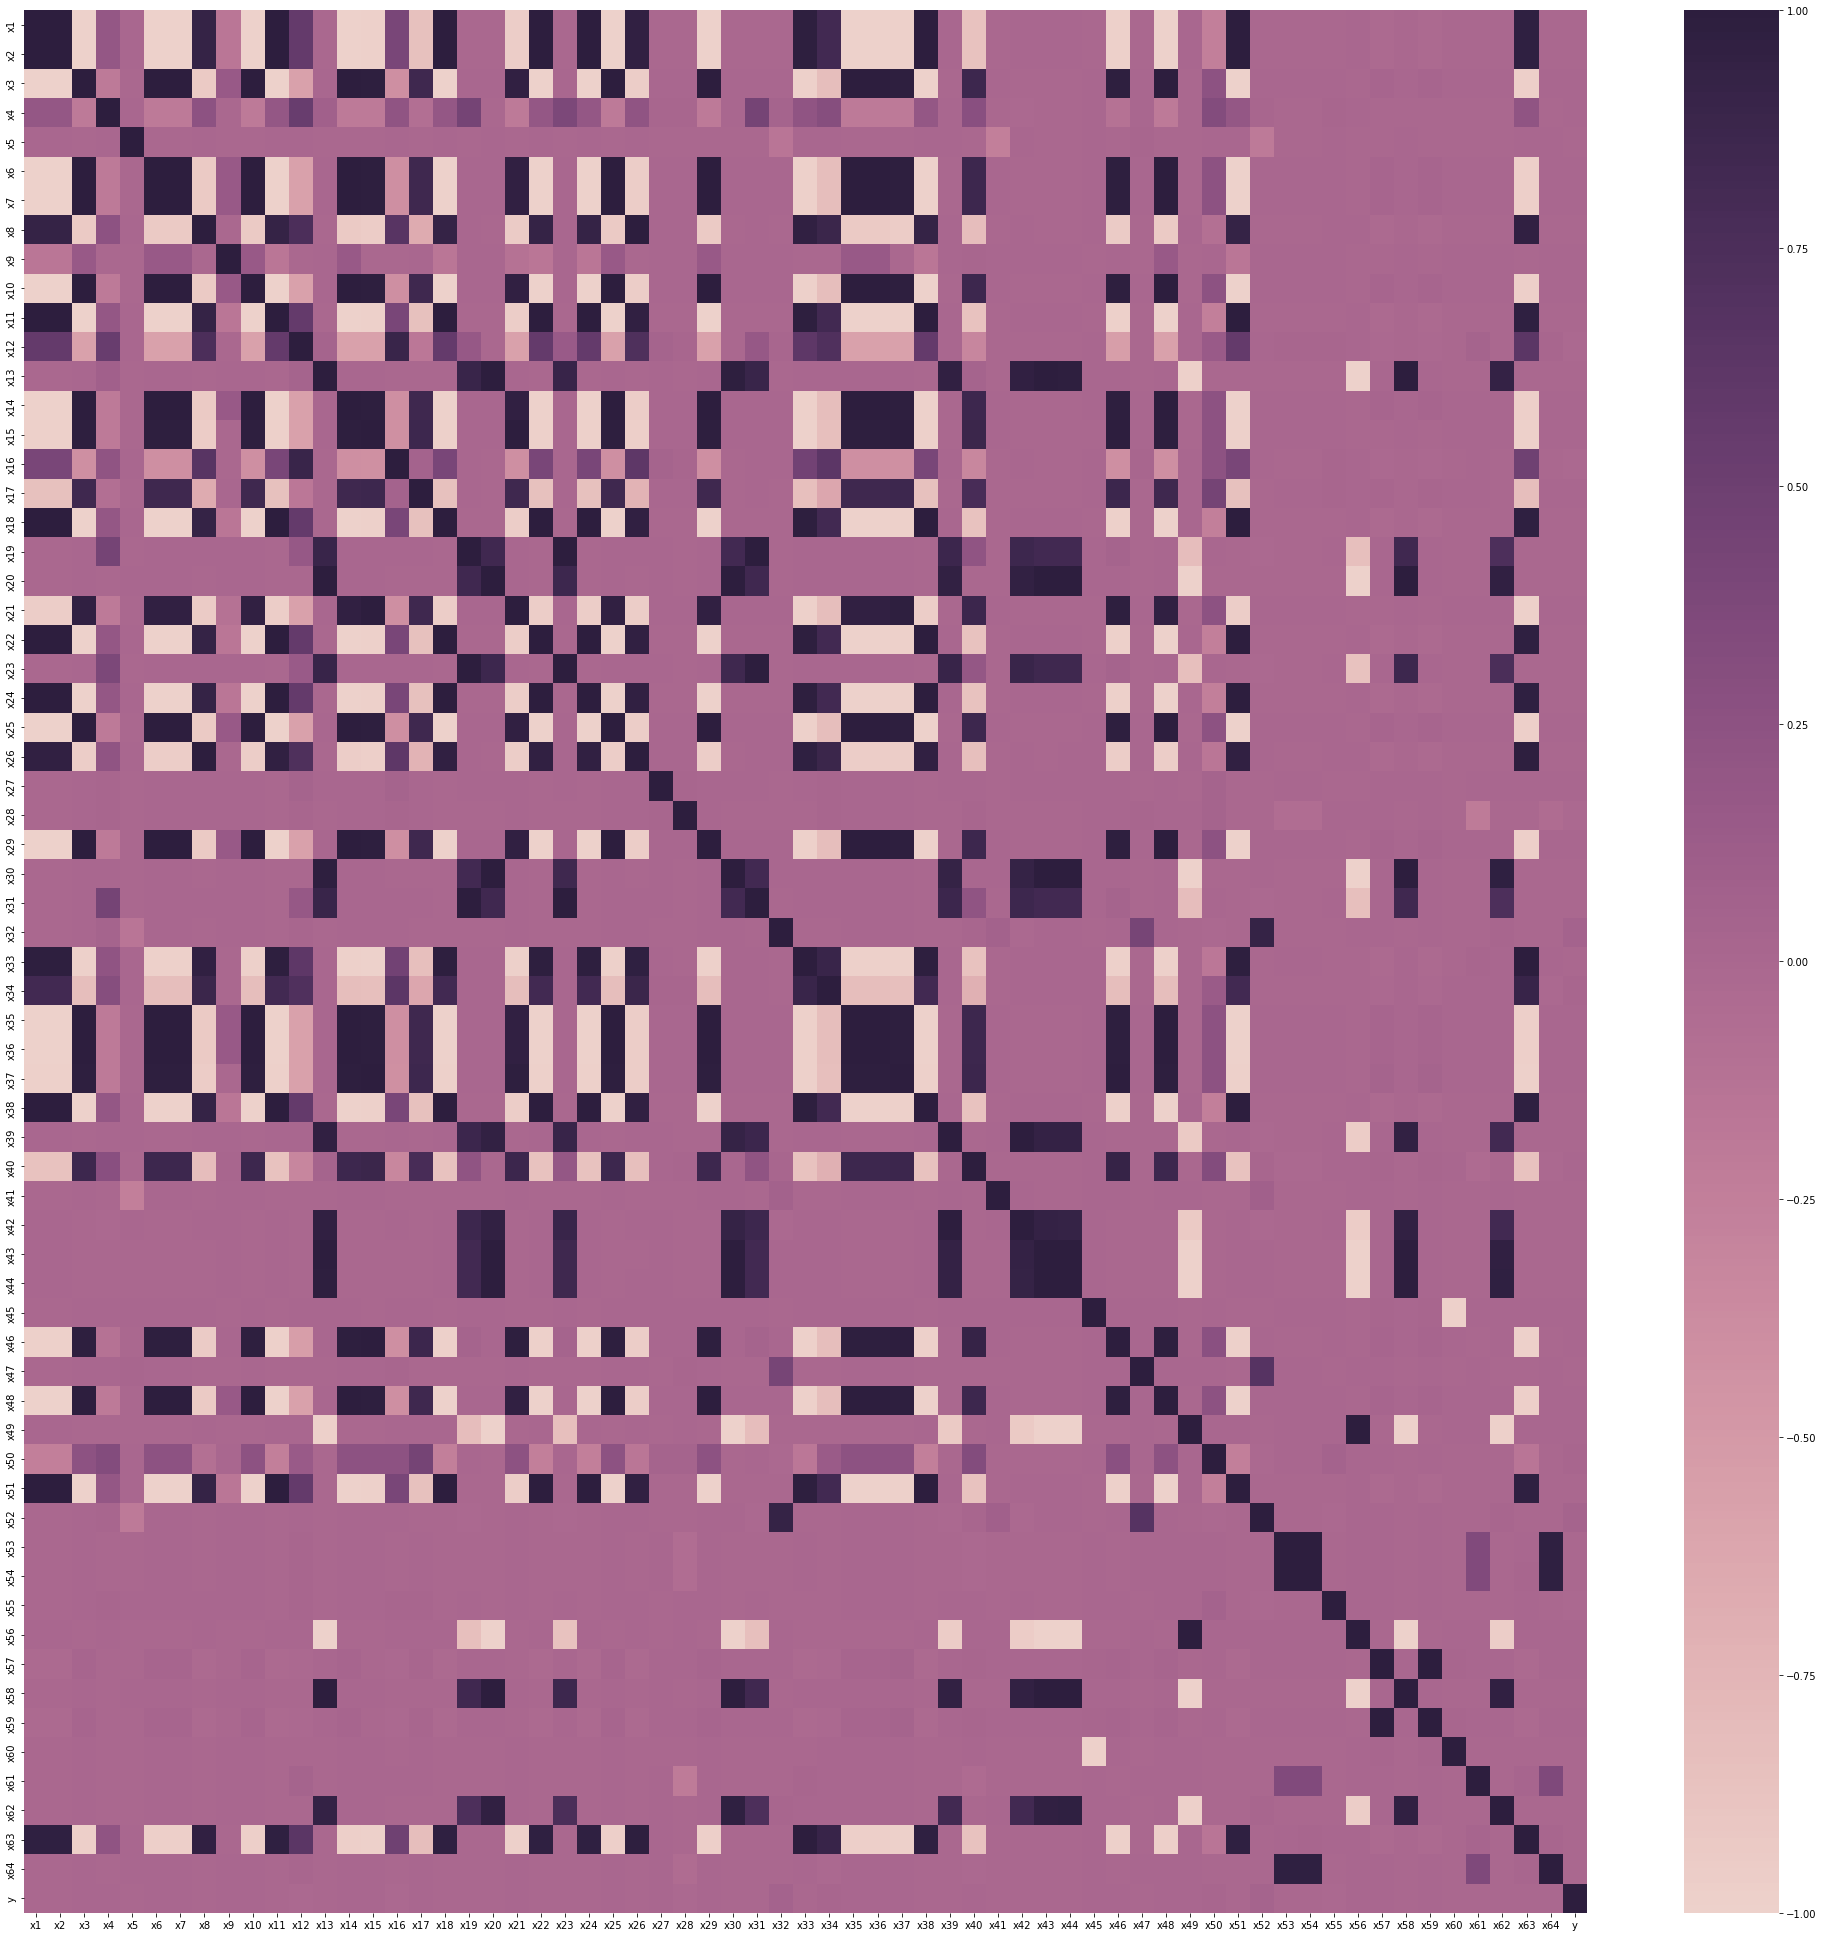

In [14]:
plt.figure(figsize=(35,35))
sns.heatmap(data = df_imputed.corr(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [17]:
df_imputed.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.33050,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.20912,0.49988,0.47225,1.9447,14.786,0.00000,0.25834,0.99601,1.6996,0.49788,...,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0


In [32]:
df_imputed.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


In [36]:
# separating the feature and target columns

# outcome
y = df_imputed['y']
y = y.astype('int64').astype(str)
y.column = 'bankrupt'

# features
X = df_imputed.drop('y',axis = 1)

In [37]:
X.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.33050,1.1389,0.50494,...,348690.0,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.20912,0.49988,0.47225,1.9447,14.786,0.00000,0.25834,0.99601,1.6996,0.49788,...,2304.6,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870


In [38]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)